In [1]:
from functions import *

In [2]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
connect(instruments)
#reset(instruments)

In [4]:
instruments['OSC'].write("SYST:DISP:UPD 1")
instruments['DAQ'].set_conn(123)

## R&W

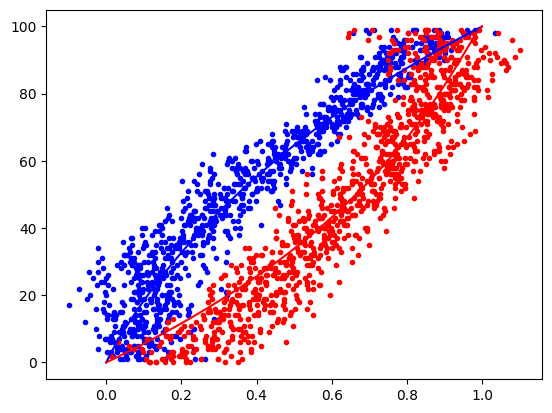

In [18]:
P, R = characterize(10, V_lim)
params = get_params(P, R)

In [19]:
params

{'N': 100,
 'A': 3.4851855267742094e-05,
 'B': 0.5583574928188848,
 'popt': {'s': array([ 1.07003942, -0.00768754]),
  'r': array([ 0.78645391, -0.0553292 ])}}

In [20]:
read(params, ch_DAQ_AWG, ch_DAQ_SMU)

0.3554646956066988

In [22]:
G = .5
write(params, ch_DAQ_AWG, ch_DAQ_SMU, G, V_lim)
read(params, ch_DAQ_AWG, ch_DAQ_SMU)

0.4150932683739794

## AWG

In [28]:
wf_dict_AWG = {
    'V' : [*np.linspace(2.0, 2.6, N), *np.linspace(-2.4, -3.0, N)], # pulse voltages
    'n' : [1 for i in range(N*2)],   # pulse repetitions
    'W' : [2e-4 for i in range(N*2)],     # pulse widths
    'T' : 2e-3,     # pulse period
    'read' : True,
    'read_V' : .1,
    'ch' : ch_AWG
}
get_and_set_wf('AWG', wf_dict_AWG)

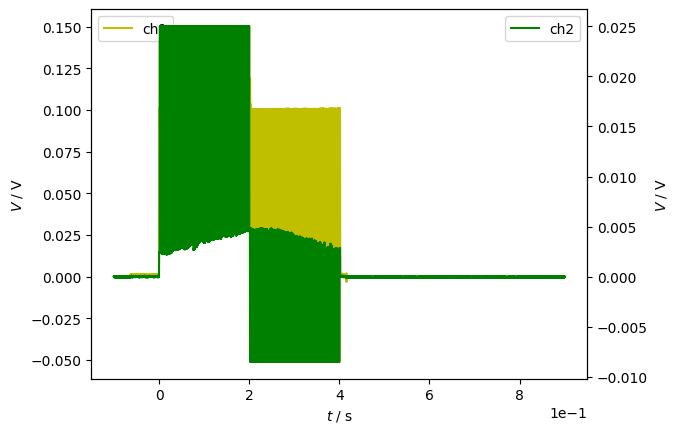

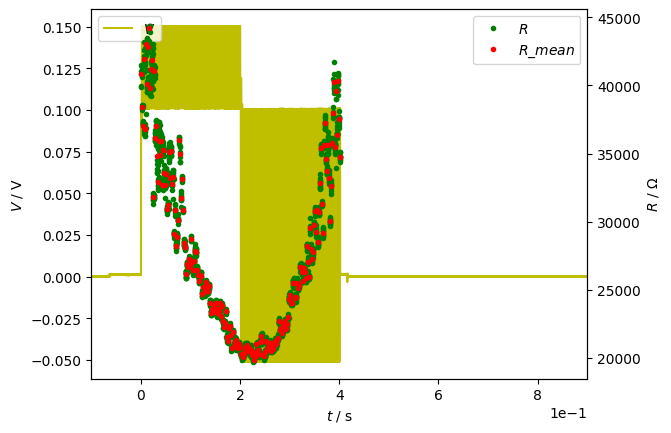

In [31]:
#meas_AWG(ch_DAQ_AWG, wf_dict_AWG, [1, 2], R_s=1e3, R_min=5e3, plot=False)
results_AWG = meas_AWG(ch_DAQ_AWG, wf_dict_AWG, [1, 2], R_s=1e3, R_min=5e3)

In [ ]:
with open(f"meas_dict/AWG_{date.today()}.json", "r") as json_file:
    meas_dict_AWG = json.load(json_file)

## AWG_SMU

In [12]:
g = 10
T = 1e-3
W = 2e-4
wf_dict_AWG_list = [
    {
        'V' : [-2.6],
        'n' : [g],
        'W' : [W],
        'T' : T,
        'read' : False,
        'read_V' : 0,
        'ch' : ch_AWG
    }, {
        'V' : [2.4],
        'n' : [g],
        'W' : [W],
        'T' : T,
        'read' : False,
        'read_V' : 0,
        'ch' : ch_AWG
    }
]
wf_dict_SMU = {
    'V' : [0],
    'n' : [0],
    'W' : [0],
    'T' : 1,
    'read' : True,
    'read_V' : .1,
    'ch' : ch_SMU
}

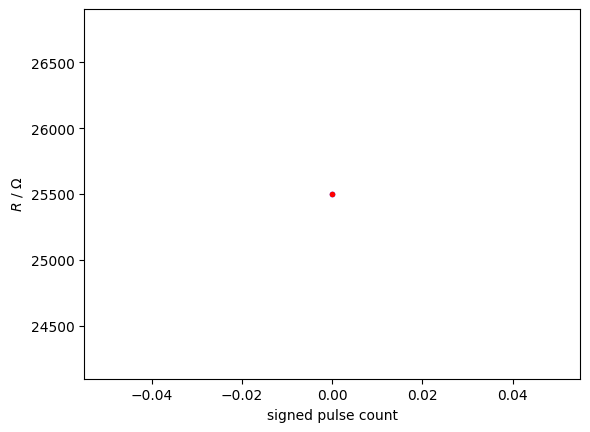

In [13]:
n = [5, 5]
#results = meas_AWG_SMU(wf_dict_AWG_list, n, ch_DAQ_AWG, ch_DAQ_SMU, wf_dict_SMU, R_s = 1e3)
results = meas_AWG_SMU([], [], ch_DAQ_AWG, ch_DAQ_SMU, wf_dict_SMU, R_s = 1e3)

## SMU

In [24]:
wf_dict_SMU = {
    'V' : [1, -1],
    'n' : [10, 10],
    'W' : [2e-3, 2e-3],
    'T' : 1e-2,
    'read' : True,
    'read_V' : .1,
    'ch' : ch_SMU
}
get_and_set_wf('SMU', wf_dict_SMU)

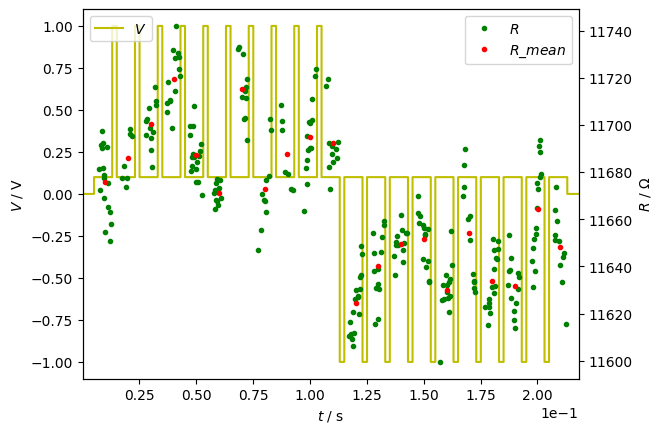

In [25]:
results_SMU = meas_SMU(ch_DAQ_SMU, wf_dict_SMU, [1, 2])

In [7]:
with open(f"meas_dict/SMU_{date.today()}.json", "r") as json_file:
    meas_dict_SMU = json.load(json_file)